In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
BATCH_SIZE = 64
NOISE_DIM = 100
NUM_EPOCHS = 500
LEARNING_RATE = 2e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self, noise_dim=NOISE_DIM): 
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.main(x)
        return x.view(-1, 1, 28, 28)
    
'''
# Discriminator
class Discriminator(nn.Module): 
    def __init__(self): 
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        '''
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.main(x)
    
# Initialize models
generator = Generator(NOISE_DIM).to(DEVICE)
discriminator = Discriminator().to(DEVICE)

# load the model from the directory
# continue training
'''generator = Generator()
generator.load_state_dict(torch.load('generator.pth'))
discriminator = Discriminator()
discriminator.load_state_dict(torch.load('discriminator.pth'))
generator.to(DEVICE)
discriminator.to(DEVICE)'''

# Loss and optimizer
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))




Epoch [1/500], d_loss: 0.7250, g_loss: 2.3893


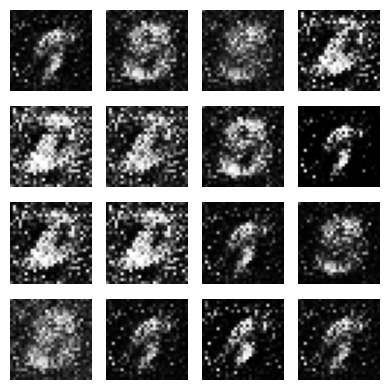

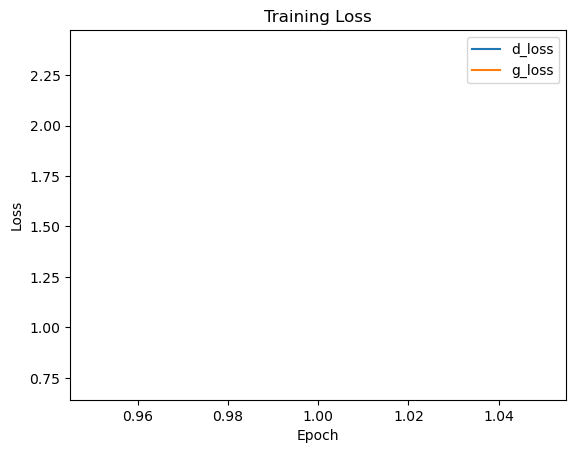

Epoch [10/500], d_loss: 0.7759, g_loss: 1.7793
Epoch [20/500], d_loss: 0.8336, g_loss: 1.6177
Epoch [30/500], d_loss: 0.8565, g_loss: 1.5496
Epoch [40/500], d_loss: 0.8681, g_loss: 1.5129
Epoch [50/500], d_loss: 0.8652, g_loss: 1.5282


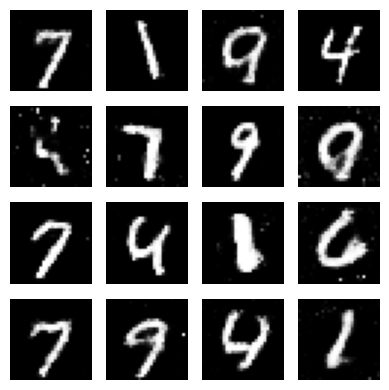

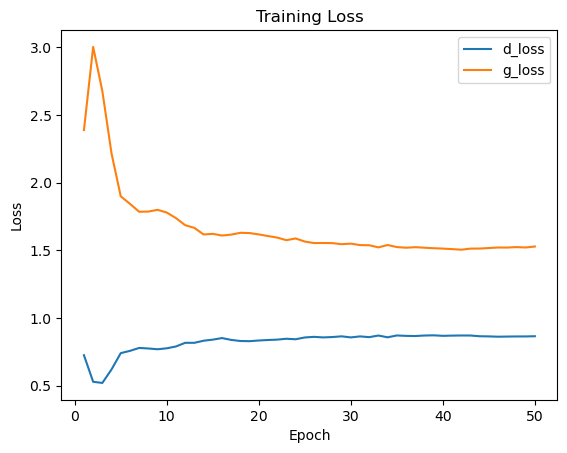

Epoch [60/500], d_loss: 0.8387, g_loss: 1.5708
Epoch [70/500], d_loss: 0.8149, g_loss: 1.6266
Epoch [80/500], d_loss: 0.7927, g_loss: 1.6574
Epoch [90/500], d_loss: 0.7648, g_loss: 1.7157
Epoch [100/500], d_loss: 0.7462, g_loss: 1.7552


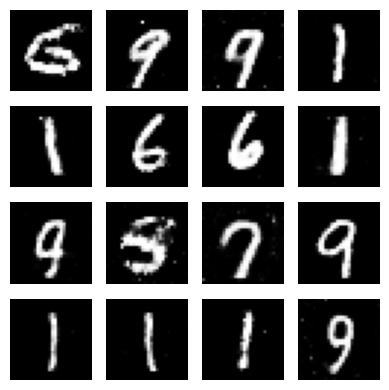

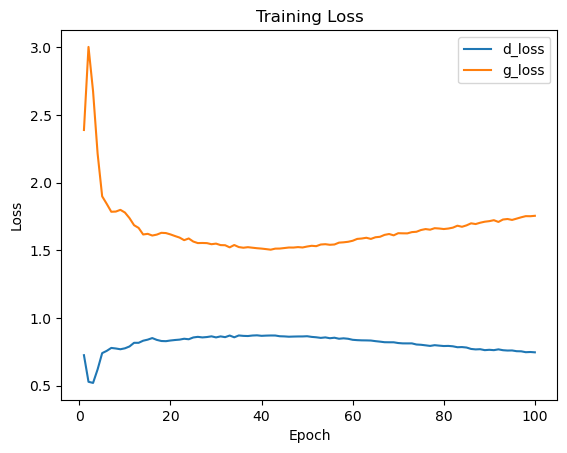

Epoch [110/500], d_loss: 0.7103, g_loss: 1.8258
Epoch [120/500], d_loss: 0.6848, g_loss: 1.8817
Epoch [130/500], d_loss: 0.6571, g_loss: 1.9485
Epoch [140/500], d_loss: 0.6292, g_loss: 2.0104
Epoch [150/500], d_loss: 0.5911, g_loss: 2.0866


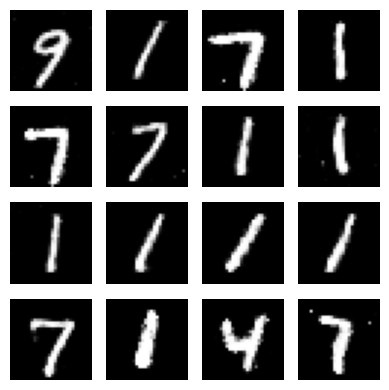

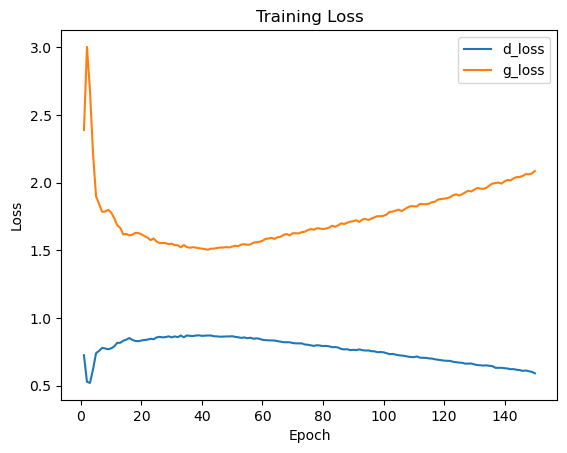

Epoch [160/500], d_loss: 0.5830, g_loss: 2.1334
Epoch [170/500], d_loss: 0.5565, g_loss: 2.1887
Epoch [180/500], d_loss: 0.5381, g_loss: 2.2306
Epoch [190/500], d_loss: 0.5159, g_loss: 2.2779
Epoch [200/500], d_loss: 0.4926, g_loss: 2.3238


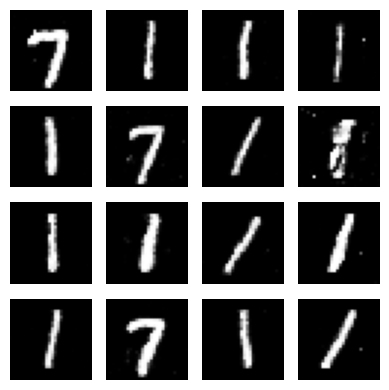

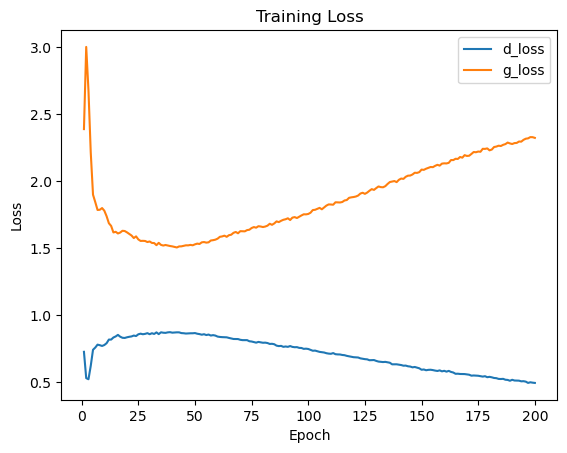

Epoch [210/500], d_loss: 0.4700, g_loss: 2.3620
Epoch [220/500], d_loss: 0.4563, g_loss: 2.3996
Epoch [230/500], d_loss: 0.4394, g_loss: 2.4261
Epoch [240/500], d_loss: 0.4299, g_loss: 2.4337
Epoch [250/500], d_loss: 0.4158, g_loss: 2.4630


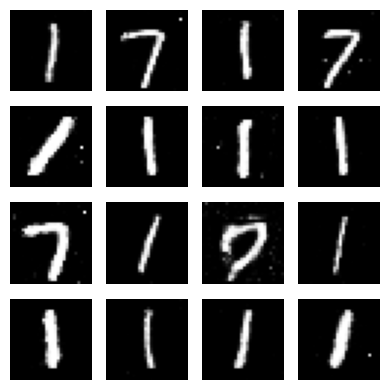

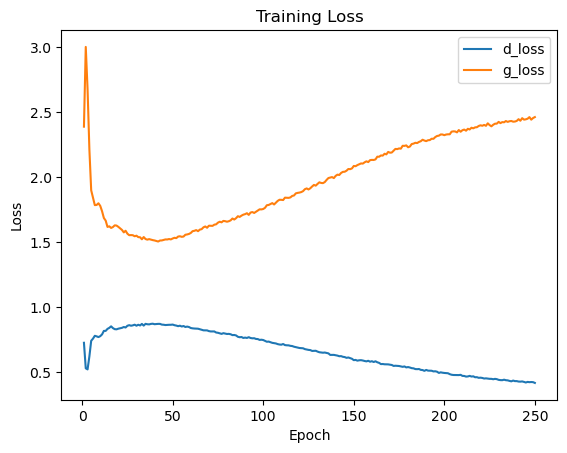

Epoch [260/500], d_loss: 0.4099, g_loss: 2.4691
Epoch [270/500], d_loss: 0.3990, g_loss: 2.4922
Epoch [280/500], d_loss: 0.3907, g_loss: 2.5106
Epoch [290/500], d_loss: 0.3905, g_loss: 2.5236
Epoch [300/500], d_loss: 0.3762, g_loss: 2.5439


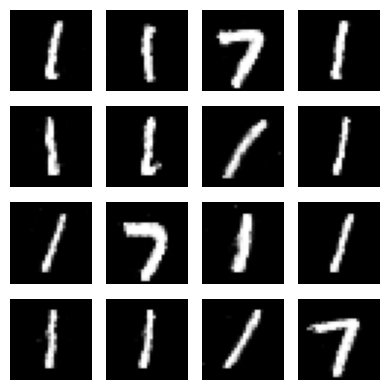

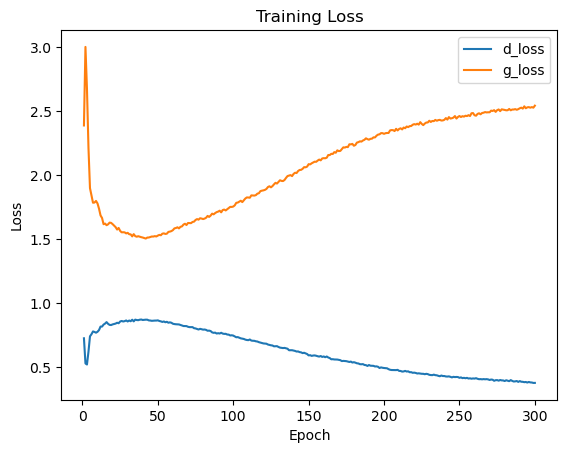

Epoch [310/500], d_loss: 0.3672, g_loss: 2.5417
Epoch [320/500], d_loss: 0.3626, g_loss: 2.5668
Epoch [330/500], d_loss: 0.3592, g_loss: 2.5731
Epoch [340/500], d_loss: 0.3487, g_loss: 2.5955
Epoch [350/500], d_loss: 0.3454, g_loss: 2.6076


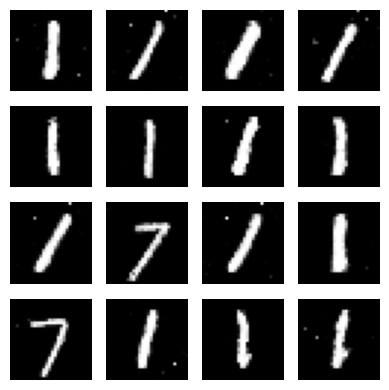

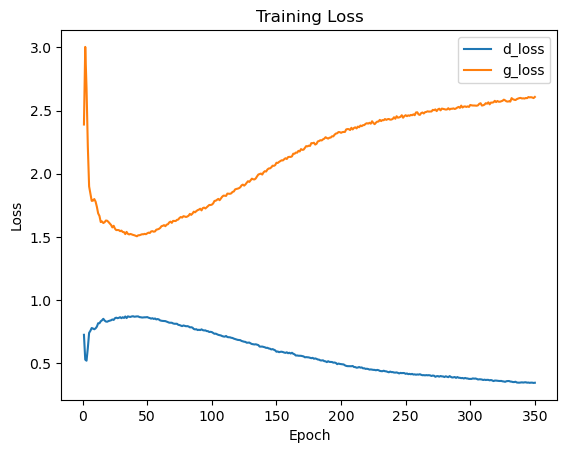

Epoch [360/500], d_loss: 0.3395, g_loss: 2.6259
Epoch [370/500], d_loss: 0.3288, g_loss: 2.6651
Epoch [380/500], d_loss: 0.3316, g_loss: 2.6670
Epoch [390/500], d_loss: 0.3222, g_loss: 2.6913
Epoch [400/500], d_loss: 0.3137, g_loss: 2.7036


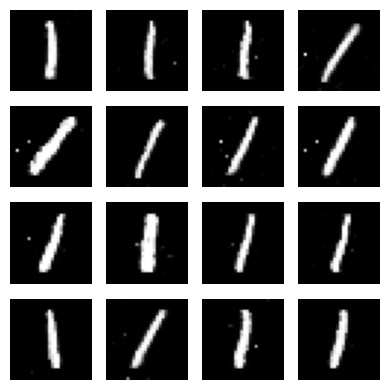

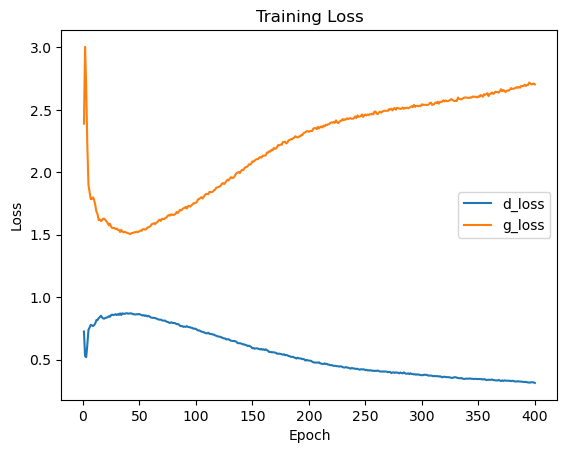

Epoch [410/500], d_loss: 0.3108, g_loss: 2.7411
Epoch [420/500], d_loss: 0.3059, g_loss: 2.7615
Epoch [430/500], d_loss: 0.2980, g_loss: 2.7717
Epoch [440/500], d_loss: 0.2926, g_loss: 2.8103
Epoch [450/500], d_loss: 0.2879, g_loss: 2.8313


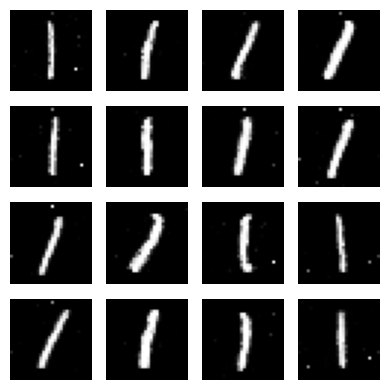

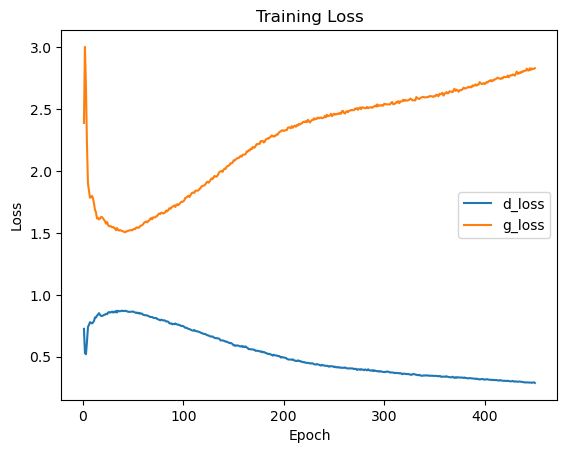

Epoch [460/500], d_loss: 0.2803, g_loss: 2.8740
Epoch [470/500], d_loss: 0.2756, g_loss: 2.9092
Epoch [480/500], d_loss: 0.2739, g_loss: 2.9340
Epoch [490/500], d_loss: 0.2671, g_loss: 2.9829
Epoch [500/500], d_loss: 0.2599, g_loss: 3.0407


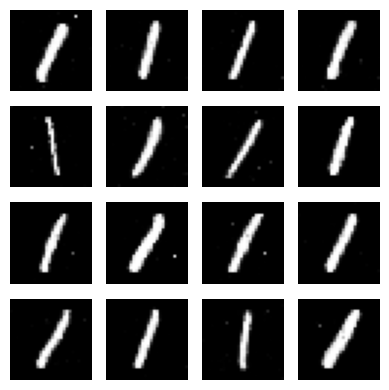

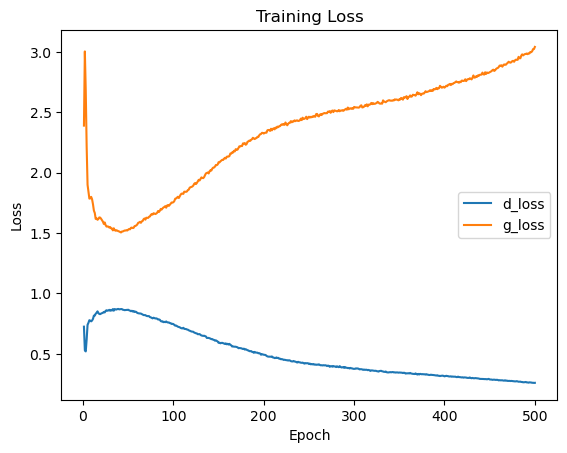

Training is finished


In [2]:
d_loss_list = []
g_loss_list = []

# Training
for epoch in range(NUM_EPOCHS):
    # Initialize loss
    d_loss_epoch = 0
    g_loss_epoch = 0
    for i, (real_images, _) in enumerate(train_loader):
        # Train Discriminator
        real_images = real_images.to(DEVICE)
        real_labels = torch.ones(real_images.size(0), 1).to(DEVICE)
        fake_labels = torch.zeros(real_images.size(0), 1).to(DEVICE)

        # Real images
        real_outputs = discriminator(real_images)
        d_loss_real = criterion(real_outputs, real_labels)

        # Fake images
        noise = torch.randn(real_images.size(0), NOISE_DIM).to(DEVICE)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        d_loss_fake = criterion(fake_outputs, fake_labels)

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        noise = torch.randn(real_images.size(0), NOISE_DIM).to(DEVICE)
        fake_images = generator(noise)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        # Backprop and optimize
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Accumulate loss
        d_loss_epoch += d_loss.item()
        g_loss_epoch += g_loss.item()

    # Calculate loss
    d_loss_epoch /= len(train_loader)
    g_loss_epoch /= len(train_loader)
    d_loss_list.append(d_loss_epoch)
    g_loss_list.append(g_loss_epoch)


    # Logging for every 20 epochs, or the first epoch and the last epoch
    if (epoch+1) % 10 == 0 or epoch == 0 or epoch == NUM_EPOCHS-1:
        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], d_loss: {d_loss_epoch:.4f}, g_loss: {g_loss_epoch:.4f}")

    if (epoch+1) % 50 == 0 or epoch == 0 or epoch == NUM_EPOCHS-1:
        # Generate images 
        noise = torch.randn(16, NOISE_DIM).to(DEVICE)
        generated_images = generator(noise).cpu().detach()
        plt.figure(figsize=(4, 4))
        for i in range(16):
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i].view(28, 28), cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Plot loss, with x-axis as epoch+1
        plt.plot(range(1, epoch+2), d_loss_list, label='d_loss')
        plt.plot(range(1, epoch+2), g_loss_list, label='g_loss')
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.show()
        

print("Training is finished")

# Save models
torch.save(generator.state_dict(), 'generator_500.pth')
torch.save(discriminator.state_dict(), 'discriminator_500.pth')
